In [100]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

# 1. Create Lattice

Flagged Bonds = [(79, 7), (78, 15), (77, 23), (76, 31), (75, 39), (74, 47), (73, 55), (72, 63)]


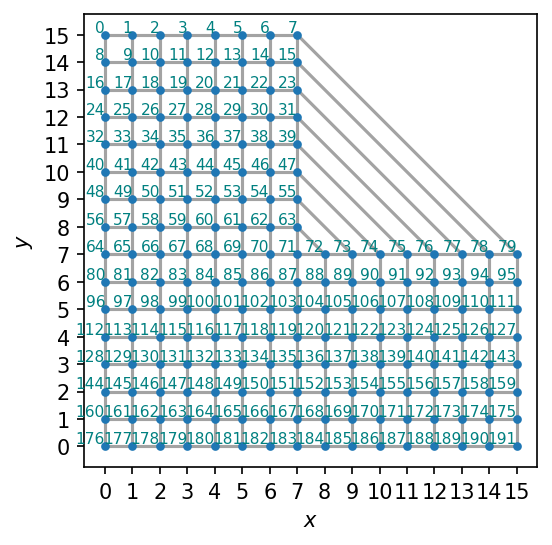

In [101]:
n = 1
hop_phase = np.exp(n * complex(0.0, 1.0) * np.pi / 2.0)

N = 16
lattice = SquareLattice(N, "open")
lattice.add_bonds(
    [(N // 2 - 1 + j * N, N // 2 * N + N - 1 - j) for j in range(N // 2)],
    [(2, 0) for i in range(N // 2)],
)

lattice.remove_sites([(i * N + j) for i in range(N // 2) for j in range(N // 2, N)])

flagged_bonds = [
    ((N // 2) ** 2 + N - (i + 1), i * N // 2 + N // 2 - 1) for i in range(N // 2)
]

# flagged_bonds = [(28, 29), (39, 40), (50, 51), (61, 62), (72, 73), (83, 84)]
# flagged_bonds = [(51, 52), (62, 63), (73, 74), (84, 85)]
# flagged_bonds = [(20, 25), (22, 27), (21, 26), (23, 28), (24, 29)]
# flagged_bonds = [(35, 4), (34, 9), (33, 14), (32, 19), (31, 24)]
# flagged_bonds = [(25, 36), (26, 37), (27, 38), (28, 39), (29, 40)]
# flagged_bonds = [(30, 31), (41, 42), (52, 53), (62, 64), (74, 75), (85, 86)]
# flagged_bonds = [(79, 7), (78, 15), (77, 23), (76, 31), (75, 39), (74, 47), (73, 55), (72, 63)]
# flagged_bonds = [(56, 64), (57, 65), (58, 66), (59, 67), (60, 68), (61, 69), (62, 70)]

print("Flagged Bonds =", flagged_bonds)

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
num_sites = lattice.get_num_sites()

lattice.plot(True)

flagged_bonds_vortex = [(56, 64), (57, 65), (58, 66), (59, 67), (60, 68), (61, 69), (62, 70), (63, 71)]
[382 383 384 385]
Lowest found energy:  0.0037642292185979804
Index of lowest absolute energy:  383


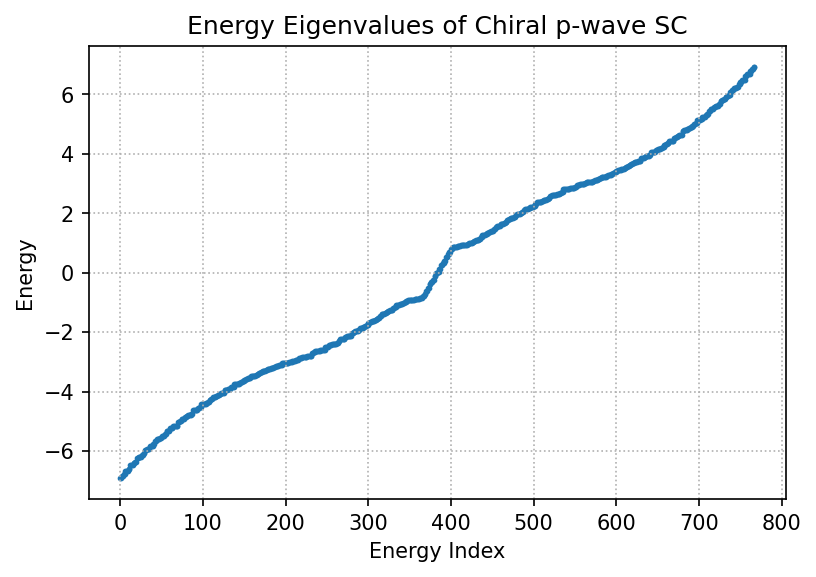

In [102]:
mu = 1.0
delta = complex(1.0, 0.0)
t = 1.0

Ham_constructor = HamiltonianConstructor(mu - 4 * t, 2 * t, 2 * t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(num_sites)

for flagged_bond in flagged_bonds:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase, num_sites)

flagged_bonds_vortex = [
    ((N // 2 - 1) * (N // 2) + j, (N // 2) * (N // 2) + j) for j in range(N // 2)
]
print("flagged_bonds_vortex =", flagged_bonds_vortex)

for flagged_bond in flagged_bonds_vortex:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, -1, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))

# gs_idx = 764//2

print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

Index = 383


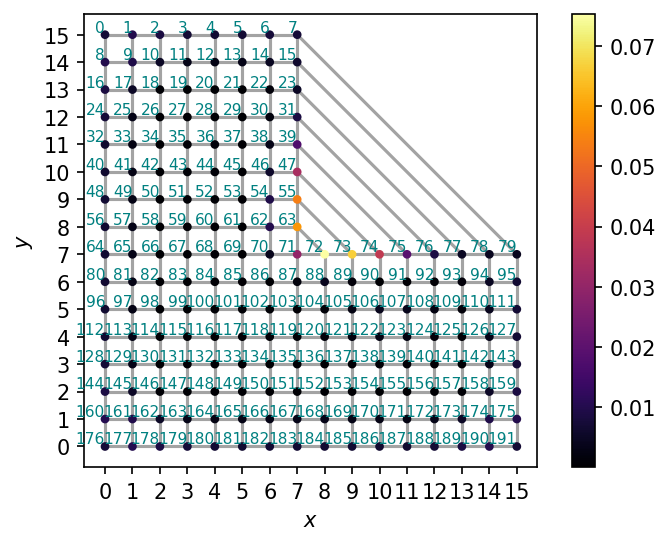

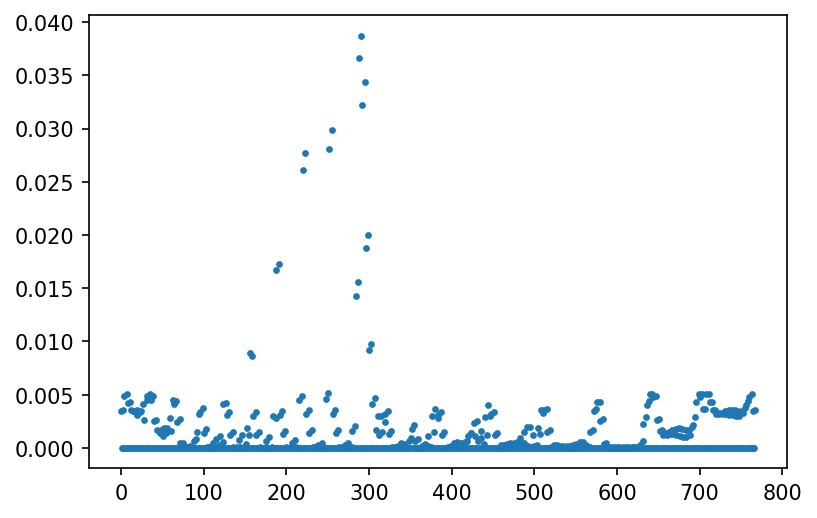

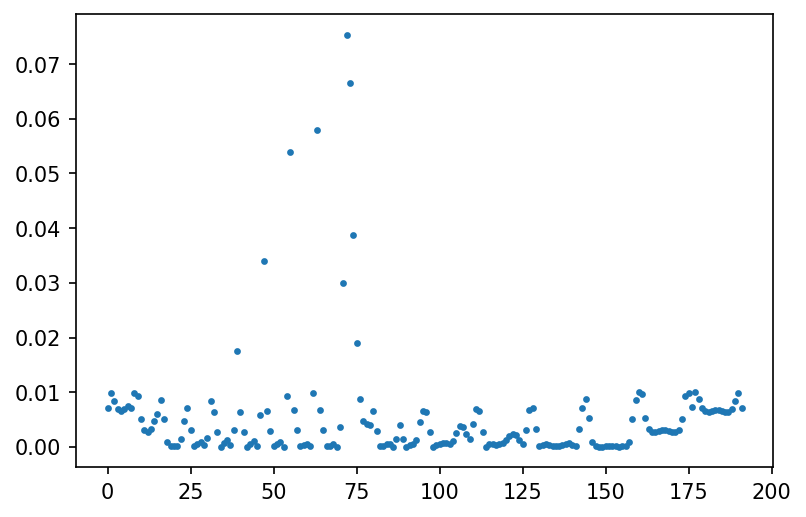

In [103]:
for gs_idx in range(gs_idx, gs_idx + 1):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]

    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)

    plt.colorbar(sc)
    plt.show()

    plt.scatter(range(len(gs_probabilities_nambu)), gs_probabilities_nambu, s=5)
    plt.show()
    plt.scatter(range(len(gs_probabilities)), gs_probabilities, s=5)
    plt.show()

## Hop phase results

### Including bond nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040238925057125174

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.04023892505712552

### Excluding bond nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040297000282122006

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.040297000282122006

In [104]:
half_filling_energy = np.sum(energies[0 : 2 * num_sites])
print("Half filling energy =", half_filling_energy)

Half filling energy = -1258.944478337504


-1258.944478337504

### Including bond nearest to disclination
$$n=+1: -140.92351803436424$$


$$n=-1: -140.92351803436426$$


$$n=0: -141.16633516847492$$


$$n=2: -140.51117786827353$$


### Exluding bond nearest to disclination
$$n=+1: -140.98592954483732$$


$$n=-1: -140.98592954483732$$


$$n=0: -141.16633516847492$$


$$n=2: -140.66173659874394$$

n = 1: -144.03423246662726


n = -1: -143.88209472829487


n = 0:  -145.10834469612362



n=-1 : Half filling energy = -813.7160537112771
n=+1: Half filling energy = -814.4124051622805
n=0: Half filling energy = -810.5137181368697


In [105]:
print(H_direct_lattice)

[[ 3.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j -3.+0.j]]


In [106]:
print(H_direct_lattice[block_indices[1], block_indices[2]])

[[ 1.+0.j   0.+0.j   0.+0.j   0.+0.5j]
 [ 0.+0.j   1.+0.j   0.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.5j -1.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.j   0.+0.j  -1.+0.j ]]


In [107]:
for i in range(num_sites):
    print(H_direct_lattice[block_indices[i], block_indices[i]])
    for neigh_idx in lattice_bonds[i]:
        print(H_direct_lattice[block_indices[i], block_indices[neigh_idx]])

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -3.+0.j]]
[[ 1.+0.j   0.+0.j   0.+0.j   0.+0.5j]
 [ 0.+0.j   1.+0.j   0.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.5j -1.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.j   0.+0.j  -1.+0.j ]]
[[ 1. +0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  1. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -1. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -1. +0.j]]
[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -3.+0.j]]
[[ 1.+0.j   0.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.j   1.+0.j   0.-0.5j  0.+0.j ]
 [ 0.+0.j   0.-0.5j -1.+0.j   0.+0.j ]
 [ 0.-0.5j  0.+0.j   0.+0.j  -1.+0.j ]]
[[ 1.+0.j   0.+0.j   0.+0.j   0.+0.5j]
 [ 0.+0.j   1.+0.j   0.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.5j -1.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.j   0.+0.j  -1.+0.j ]]
[[ 1. +0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  1. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -

In [108]:
print(H_direct_lattice)

[[ 3.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j -3.+0.j]]
